In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tiles3 as tc
import gymnasium as gym
from agents import SarsaLambdaAgent

import time
from IPython.display import clear_output

In [2]:
class TileCoder:

    def __init__(self, iht_size, num_tiles, num_tilings):
        self.iht = tc.IHT(iht_size)
        self.num_tiles = num_tiles
        self.num_tilings = num_tilings

    def get_tiles(self, obs):
        cos, sin, angular = obs
        cos *= self.num_tiles / 2.0
        sin *= self.num_tiles / 2.0
        angular *= self.num_tiles / 16.0
        tiles = tc.tiles(self.iht, self.num_tilings, [cos, sin, angular])
        return np.array(tiles)

In [3]:
def plot(total_reward_list):
    plt.figure(figsize=(4, 3))
    plt.plot(total_reward_list, color='mediumseagreen')
    plt.grid(alpha=0.2)
    plt.title('SARSA(λ) for Pendulum-v1')
    plt.xlabel('episode')
    plt.ylabel('total_reward')
    plt.show()
    clear_output(wait=True)

def render(env, agent):
    img = env.render()
    plt.imshow(img)
    plt.show()
    print(agent.last_tiles)
    clear_output(wait=True)

In [22]:
env = gym.make('Pendulum-v1', g=9.81, render_mode='rgb_array')
tilecoder = TileCoder(iht_size=4096, num_tiles=4, num_tilings=16)
agent = SarsaLambdaAgent(num_actions=3, tilecoder=tilecoder)
actions = np.array([[-2.0, 0.0, 2.0]]).T
agent.alpha = 0.2 / tilecoder.num_tilings
agent.gamma = 1.0
agent.epsilon = 0.0
agent.lambd = 0.9
total_reward_list = []

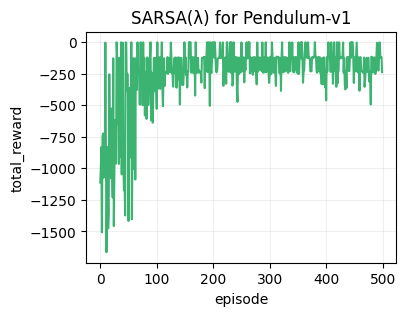

In [23]:
num_episodes = 500
# mode = 'render'
mode = 'plot'

for episode in range(num_episodes):
    obs, _ = env.reset()
    action = actions[agent.start(obs)]
    total_reward = 0
    while True:
        obs, reward, done, over, _ = env.step(action)
        action = actions[agent.step(obs, reward)]
        total_reward += reward
        if mode == 'render':
            render(env, agent)
        if done or over:
            agent.end(reward)
            break
    total_reward_list.append(total_reward)
    if mode == 'plot':
        plot(total_reward_list)